/tmp/ipykernel_6826/1881435459.py:98: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[idx, 1].set_xlim(xlim_vis)


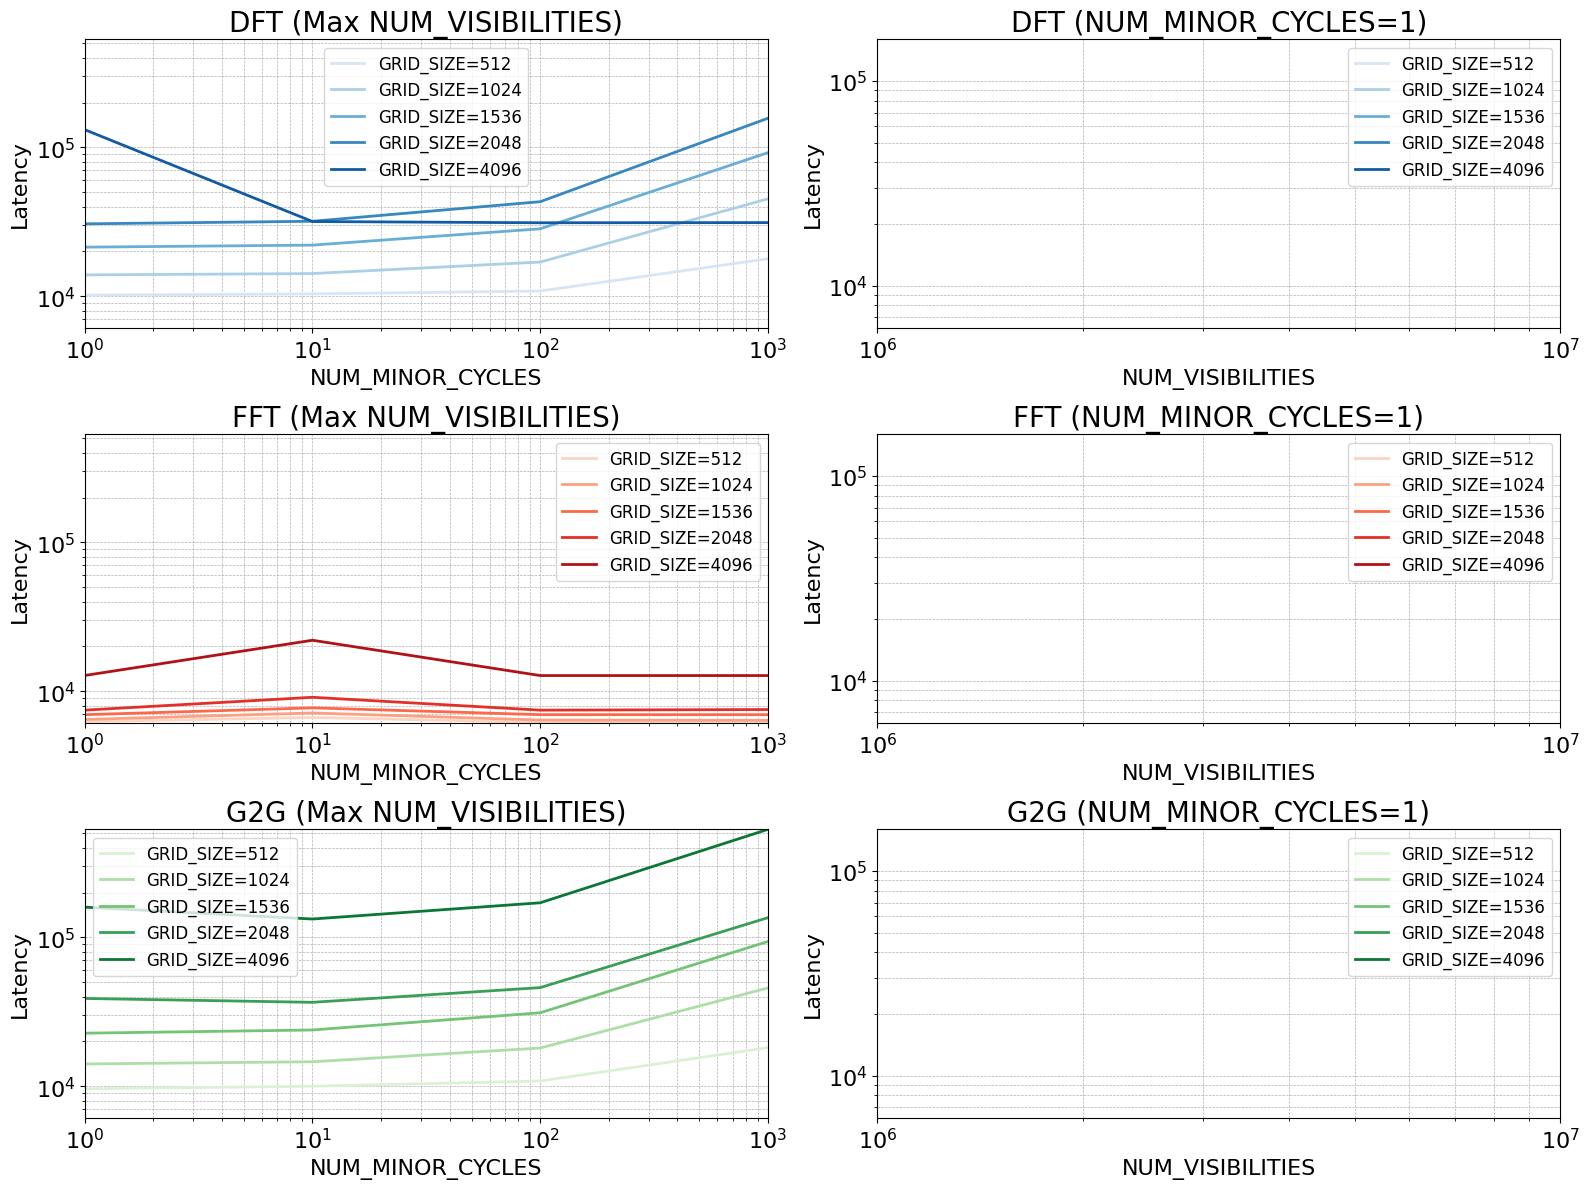

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Fichiers à afficher côte à côte
simulated_sota_csv_files = {
    "dft": "code_dft_nnode_ms/dft.csv",
    "fft": "code_fft_nnode_ms/fft.csv",
    "g2g": "code_g2g_nnode_ms/g2g.csv",
}

# Fonction pour charger les données depuis un CSV
def load_simu_csv_to_numpy(file_path):
    df = pd.read_csv(file_path, sep=';')

    # Extraire les valeurs uniques pour les paramètres
    grid_sizes = sorted(df['GRID_SIZE'].unique())
    num_cycles = sorted(df['NUM_MINOR_CYCLES'].unique())
    num_visibilities = sorted(df['NUM_VISIBILITIES'].unique())

    latency_simu = np.zeros((len(num_visibilities), len(num_cycles), len(grid_sizes)))

    # Remplir la matrice des latences simulées
    for i, vis in enumerate(num_visibilities):
        for j, cycles in enumerate(num_cycles):
            for k, grid in enumerate(grid_sizes):
                value = df[(df['GRID_SIZE'] == grid) & (df['NUM_MINOR_CYCLES'] == cycles) & (df['NUM_VISIBILITIES'] == vis)]['DurationII'].values[0]
                latency_simu[i, j, k] = value

    return latency_simu, grid_sizes, num_cycles, num_visibilities

# Fonction pour tracer les graphiques
def plot_simu_data(simulated_sota_csv_files):
    plt.style.use('default')  # Utiliser le style par défaut pour plus de simplicité
    num_files = len(simulated_sota_csv_files)
    fig, axes = plt.subplots(num_files, 2, figsize=(16, 4 * num_files))

    all_cycles = []
    all_visibilities = []
    all_durations_cycles = []
    all_durations_vis = []

    # D'abord : on charge tout pour calculer les bornes globales
    data_loaded = []
    for name, file_path in simulated_sota_csv_files.items():
        latency_simu, grid_sizes, num_cycles, num_visibilities = load_simu_csv_to_numpy(file_path)
        data_loaded.append((name, latency_simu, grid_sizes, num_cycles, num_visibilities))

        all_cycles.extend(num_cycles)
        all_visibilities.extend(num_visibilities)

        for k in range(len(grid_sizes)):
            all_durations_cycles.extend(latency_simu[-1, :, k])
            all_durations_vis.extend(latency_simu[:, 0, k])

    # Définir les bornes globales des axes
    xlim_cycles = (min(all_cycles), max(all_cycles))
    ylim_cycles = (min(all_durations_cycles), max(all_durations_cycles))

    xlim_vis = (min(all_visibilities), max(all_visibilities))
    ylim_vis = (min(all_durations_vis), max(all_durations_vis))
    
    # Palettes spécifiques par algorithme
    custom_colormaps = {
        "dft": cm.Blues,
        "fft": cm.Reds,
        "g2g": cm.Greens
    }


    # Ensuite : on trace avec les mêmes limites pour tous
    #palette = plt.get_cmap('viridis')  # Utiliser une palette de couleurs plus moderne

    for idx, (name, latency_simu, grid_sizes, num_cycles, num_visibilities) in enumerate(data_loaded):
        # DurationII vs NUM_MINOR_CYCLES
        for k, grid_size in enumerate(grid_sizes):
            axes[idx, 0].plot(num_cycles, latency_simu[-1, :, k], label=f'GRID_SIZE={grid_size}', linewidth=2, color=custom_colormaps[name]((k + 1) / (len(grid_sizes) + 1)))#color=palette(k / len(grid_sizes))
            axes[idx, 0].set_xlabel('NUM_MINOR_CYCLES', fontsize=16)
            axes[idx, 0].set_ylabel('Latency', fontsize=16)
            axes[idx, 0].set_title(f'{name.upper()} (Max NUM_VISIBILITIES)', fontsize=20)
            axes[idx, 0].set_xscale('log')
            axes[idx, 0].set_yscale('log')
            axes[idx, 0].set_xlim(xlim_cycles)
            axes[idx, 0].set_ylim(ylim_cycles)
            axes[idx, 0].legend(fontsize=12)
            axes[idx, 0].grid(True, which="both", ls="--", linewidth=0.5)
            axes[idx, 0].tick_params(axis='both', which='major', labelsize=16)  # Augmenter la taille des chiffres sur les axes

        # DurationII vs NUM_VISIBILITIES
        for k, grid_size in enumerate(grid_sizes):
            axes[idx, 1].plot(num_visibilities, latency_simu[:, 0, k], label=f'GRID_SIZE={grid_size}', linewidth=2, color=custom_colormaps[name]((k + 1) / (len(grid_sizes) + 1)))
            axes[idx, 1].set_xlabel('NUM_VISIBILITIES', fontsize=16)
            axes[idx, 1].set_ylabel('Latency', fontsize=16)
            axes[idx, 1].set_title(f'{name.upper()} (NUM_MINOR_CYCLES=1)', fontsize=20)
            axes[idx, 1].set_xscale('log')
            axes[idx, 1].set_yscale('log')
            axes[idx, 1].set_xlim(xlim_vis)
            axes[idx, 1].set_ylim(ylim_vis)
            axes[idx, 1].legend(fontsize=12)
            axes[idx, 1].grid(True, which="both", ls="--", linewidth=0.5)
            axes[idx, 1].tick_params(axis='both', which='major', labelsize=16)  # Augmenter la taille des chiffres sur les axes

    plt.tight_layout()
    plt.show()

# Tracer les données
plot_simu_data(simulated_sota_csv_files)



DFT (GRID_SIZE=512, N_CYCLES=1):
  NUM_VISIBILITIES = 1477782, DurationII = 10159.713

FFT (GRID_SIZE=512, N_CYCLES=1):
  NUM_VISIBILITIES = 1477782, DurationII = 6240.712

G2G (GRID_SIZE=512, N_CYCLES=1):
  NUM_VISIBILITIES = 1477782, DurationII = 9597.578


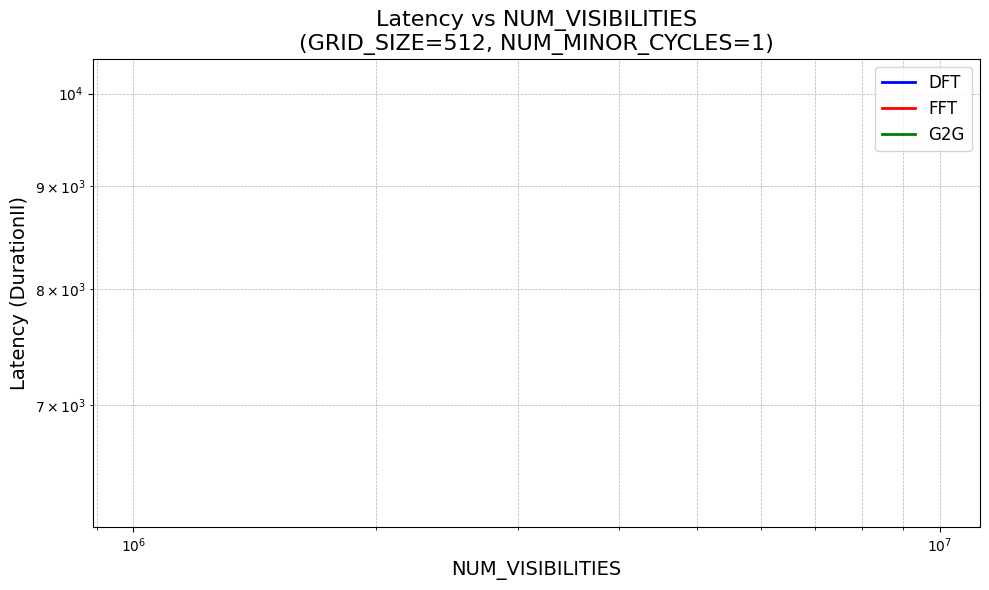

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fichiers CSV pour chaque algorithme
simulated_sota_csv_files = {
    "dft": "code_dft_nnode_ms/dft.csv",
    "fft": "code_fft_nnode_ms/fft.csv",
    "g2g": "code_g2g_nnode_ms/g2g.csv",
}

# Fonction pour charger les données filtrées
def load_filtered_data(file_path, target_grid_size=2048, target_num_cycles=1):
    df = pd.read_csv(file_path, sep=';')
    df_filtered = df[(df['GRID_SIZE'] == target_grid_size) & (df['NUM_MINOR_CYCLES'] == target_num_cycles)]
    df_filtered = df_filtered.sort_values(by='NUM_VISIBILITIES')
    x = df_filtered['NUM_VISIBILITIES'].values
    y = df_filtered['DurationII'].values
    return x, y

# Couleurs personnalisées
colors = {
    "dft": 'blue',
    "fft": 'red',
    "g2g": 'green',
}

# Paramètres ciblés
target_grid_size = 512
target_num_cycles = 1

# Création du graphique
plt.figure(figsize=(10, 6))

for name, file_path in simulated_sota_csv_files.items():
    x, y = load_filtered_data(file_path, target_grid_size, target_num_cycles)
    
    # Impression des valeurs dans la console
    print(f"\n{name.upper()} (GRID_SIZE={target_grid_size}, N_CYCLES={target_num_cycles}):")
    for xi, yi in zip(x, y):
        print(f"  NUM_VISIBILITIES = {xi}, DurationII = {yi}")
    
    # Tracé
    label = f"{name.upper()}"
    plt.plot(x, y, label=label, color=colors[name], linewidth=2)

plt.xlabel('NUM_VISIBILITIES', fontsize=14)
plt.ylabel('Latency (DurationII)', fontsize=14)
plt.title(f'Latency vs NUM_VISIBILITIES\n(GRID_SIZE={target_grid_size}, NUM_MINOR_CYCLES={target_num_cycles})', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



DFT (GRID_SIZE=512, N_CYCLES=1):
  NUM_VISIBILITIES = 12963, DurationII = 1051.088
  NUM_VISIBILITIES = 164198, DurationII = 1714.323
  NUM_VISIBILITIES = 1477782, DurationII = 5268.215
  NUM_VISIBILITIES = 14777820, DurationII = 55287.05

FFT (GRID_SIZE=512, N_CYCLES=1):
  NUM_VISIBILITIES = 50958, DurationII = 1404.336
  NUM_VISIBILITIES = 164198, DurationII = 1719.572
  NUM_VISIBILITIES = 1477782, DurationII = 5011.174
  NUM_VISIBILITIES = 14777820, DurationII = 33470.07

G2G (GRID_SIZE=512, N_CYCLES=1):
  NUM_VISIBILITIES = 50958, DurationII = 1616.498
  NUM_VISIBILITIES = 164198, DurationII = 1907.905
  NUM_VISIBILITIES = 1477782, DurationII = 5481.997
  NUM_VISIBILITIES = 14777820, DurationII = 37003.259
  NUM_VISIBILITIES = 14777820, DurationII = 39433.677


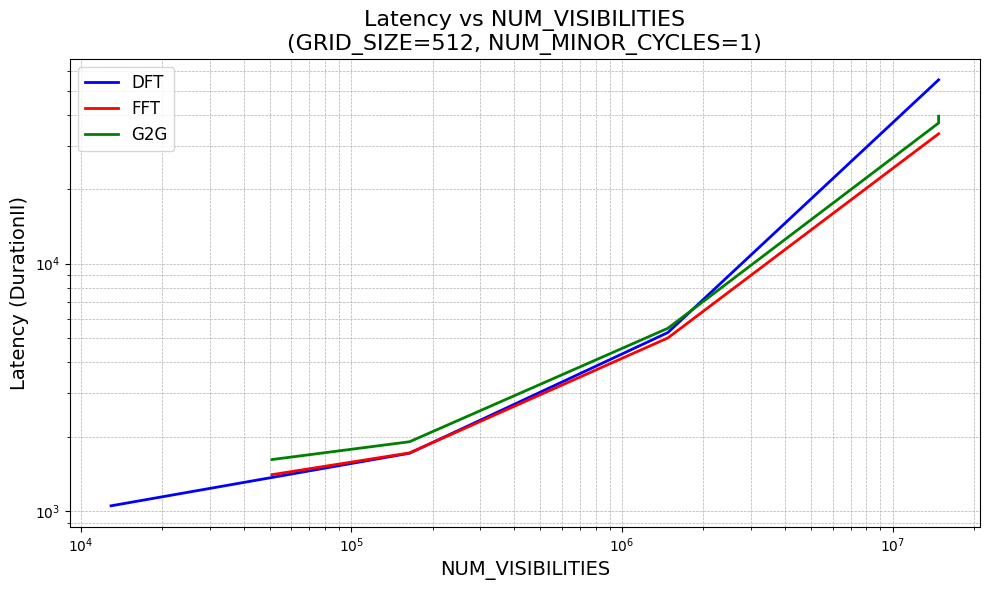

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fichiers CSV pour chaque algorithme
simulated_sota_csv_files = {
    "dft": "code_dft_joint_nnode_ms/dft.csv",
    "fft": "code_fft_joint_nnode_ms/fft.csv",
    "g2g": "code_g2g_joint_nnode_ms/g2g.csv",
}

# Fonction pour charger les données filtrées
def load_filtered_data(file_path, target_grid_size=2048, target_num_cycles=1):
    df = pd.read_csv(file_path, sep=';')
    df_filtered = df[(df['GRID_SIZE'] == target_grid_size) & (df['NUM_MINOR_CYCLES'] == target_num_cycles)]
    df_filtered = df_filtered.sort_values(by='NUM_VISIBILITIES')
    x = df_filtered['NUM_VISIBILITIES'].values
    y = df_filtered['DurationII'].values
    return x, y

# Couleurs personnalisées
colors = {
    "dft": 'blue',
    "fft": 'red',
    "g2g": 'green',
}

# Paramètres ciblés
target_grid_size = 512
target_num_cycles = 1

# Création du graphique
plt.figure(figsize=(10, 6))

for name, file_path in simulated_sota_csv_files.items():
    x, y = load_filtered_data(file_path, target_grid_size, target_num_cycles)
    
    # Impression des valeurs dans la console
    print(f"\n{name.upper()} (GRID_SIZE={target_grid_size}, N_CYCLES={target_num_cycles}):")
    for xi, yi in zip(x, y):
        print(f"  NUM_VISIBILITIES = {xi}, DurationII = {yi}")
    
    # Tracé
    label = f"{name.upper()}"
    plt.plot(x, y, label=label, color=colors[name], linewidth=2)

plt.xlabel('NUM_VISIBILITIES', fontsize=14)
plt.ylabel('Latency (DurationII)', fontsize=14)
plt.title(f'Latency vs NUM_VISIBILITIES\n(GRID_SIZE={target_grid_size}, NUM_MINOR_CYCLES={target_num_cycles})', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
